<a href="https://colab.research.google.com/github/emc-vb/EEG-study/blob/main/VR_EEG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#**Preparing the Data**


*   II: Semantic Incongruence + Syntactic Incongreunce
*   IC: Semantic Incongruence + Syntactic Congreunce
*   CI: Semantic Congruence + Syntactic Incongreunce
*   CC: Semantic Congruence + Syntactic Congreunce




In [31]:
d1 = pd.read_csv('data1.csv')
d2 = pd.read_csv('data2.csv')
d3 = pd.read_csv('data3.csv')
d4 = pd.read_csv('data4.csv')
d5 = pd.read_csv('data5.csv')
d6 = pd.read_csv('data6.csv')
d7 = pd.read_csv('data7.csv')
d8 = pd.read_csv('data8.csv')


df = pd.concat([d1,d2,d3,d4,d5,d6,d7,d8])

#remove spaces in column names
df = df.rename(columns = {' ReactionTime': 'ReactionTime', ' Rating': 'Rating', ' Response': 'Response'}, inplace = False)



In [35]:
#extract object from stimulus name
df['Object']=df['Stimulus'].str[:-3]

#extract condition from stimulus name
df['Condition']=df['Stimulus'].str[-2:]


#get response accuracy
df['Correctness'] = df['Response'] == df['Object']

#remove rows with incorrect answers (?)
#remove rows with 0 reaction times

#condition into visual & auditory
df['Visual'] = df['Condition'].str[0].map({'I': 'Incongruent', 'C': 'Congruent'})
df['Auditive'] = df['Condition'].str[1].map({'I': 'Incongruent', 'C': 'Congruent'})
df

,Stimulus,ReactionTime,Response,Rating,Object,Condition,Correctness,Visual,Auditive
0,House II,4321,House,1,House,II,True,Incongruent,Incongruent
1,House CC,4187,House,5,House,CC,True,Congruent,Congruent
2,Tree IC,2670,Tree,2,Tree,IC,True,Incongruent,Congruent
3,House IC,2339,House,2,House,IC,True,Incongruent,Congruent
4,Tree II,2428,Tree,1,Tree,II,True,Incongruent,Incongruent
...,...,...,...,...,...,...,...,...,...
3,House CC,2078,House,5,House,CC,True,Congruent,Congruent
4,Tree IC,2217,Tree,2,Tree,IC,True,Incongruent,Congruent
5,House IC,2173,House,2,House,IC,True,Incongruent,Congruent
6,Tree II,1563,Tree,2,Tree,II,True,Incongruent,Incongruent


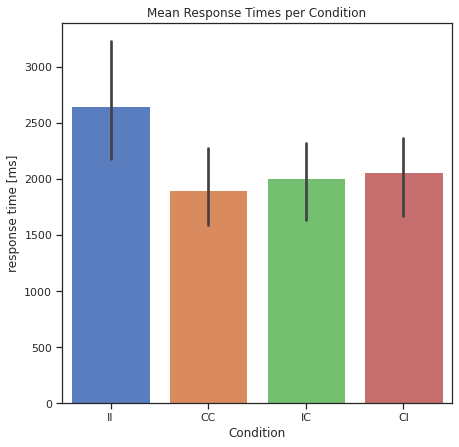

In [36]:

#get mean reaction time per condition
mean_rt_condition = df.groupby(['Condition'], as_index = False)['ReactionTime'].mean()
mean_rt_condition

#plot mean reaction time per condition
fig, ax= plt.subplots(nrows=1, ncols=1, figsize=(7,7))
ax = sns.barplot(data=df, x="Condition", y="ReactionTime")
ax.set(title='Mean Response Times per Condition', ylabel='response time [ms]')

plt.show()

[Text(0, 0.5, 'response time [ms]')]

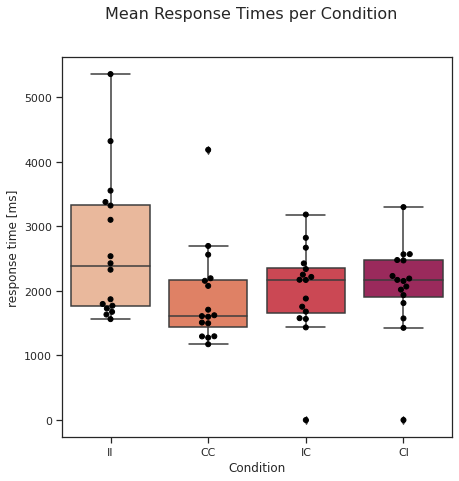

In [37]:

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,7))
fig.suptitle('Mean Response Times per Condition', fontsize=16)
sns.set_palette('rocket_r')

sns.boxplot(x='Condition', y='ReactionTime', data=df)
sns.swarmplot(x='Condition', y='ReactionTime', linewidth=1, color='black', data=df)
ax.set(ylabel='response time [ms]')

In [ ]:
#habituation of reaction times?

In this section, we analyse the behavioural data (the rating). First, we will check if there has been a habituation, meaning that incongruent stimuli in later trials did not elicit the intended surprise effect because they were not novel anymore.

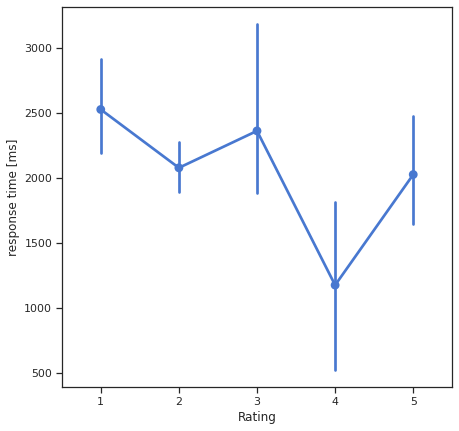

In [38]:
# Was the response time correlated with the unexpectedness? =>not really, when undecided,RT was highest

fig, ax= plt.subplots(nrows=1, ncols=1, figsize=(7,7))

sns.set(palette='muted', style='ticks',)
ax = sns.pointplot(x='Rating', y='ReactionTime', data=df)
ax.set(ylabel='response time [ms]')

plt.show()


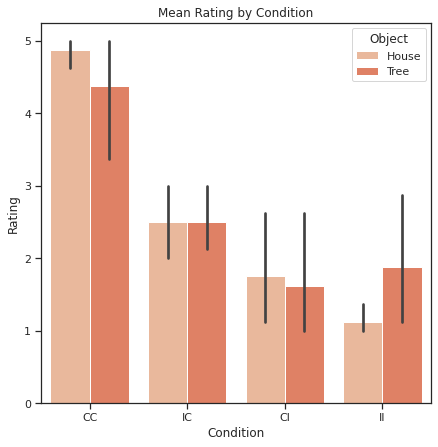

In [39]:
# Was the Rating correlated to the condition? =>Yes

fig, ax= plt.subplots(nrows=1, ncols=1, figsize=(7,7))
sns.set(palette='rocket_r', style='ticks',)
ax = sns.barplot(data=df, x="Condition", y="Rating", hue = "Object", order = df.groupby("Condition")["Rating"].sum().sort_values(ascending=False).index.values)
ax.set(title='Mean Rating by Condition')

plt.show()


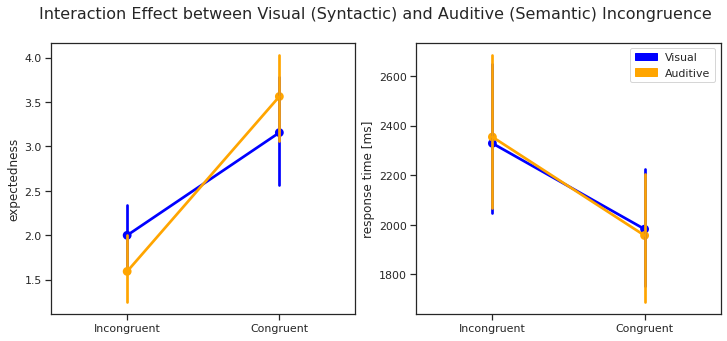

In [30]:

fig, axes= plt.subplots(nrows=1, ncols=2, figsize=(12,5))
fig.suptitle('Interaction Effect between Visual (Syntactic) and Auditive (Semantic) Incongruence', fontsize=16)

axes[0] = sns.pointplot(x='Visual', y='Rating', color = "blue", data=df, ax = axes[0])
axes[0] = sns.pointplot(x='Auditive', y='Rating', color = "orange", data=df, ax = axes[0])
axes[0].set(xlabel="", ylabel='expectedness')

axes[1] = sns.pointplot(x='Visual', y='ReactionTime', color = "blue", data=df, ax = axes[1])
axes[1] = sns.pointplot(x='Auditive', y='ReactionTime', color = "orange", data=df, ax = axes[1])
axes[1].set(xlabel="", ylabel='response time [ms]')

blue_patch = mpatches.Patch(color='blue', label='Visual')
orange_patch = mpatches.Patch(color='orange', label='Auditive')
plt.legend(handles=[blue_patch, orange_patch])

plt.show()